In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Data source = https://catalog.data.gov/dataset/under-age-65-disability-diagnoses-of-supplemental-security-income-ssi-recipients-by-census
# Addtional information = https://www.ssa.gov/policy/docs/data/ssi-2010/SSI-2010-User-Manual.pdf

In [3]:
# File path for first csv 
ssi_data = "ssi_data.csv"
# Read our first csv into Pandas as a dataframe 
ssi_data_df = pd.read_csv(ssi_data)

In [4]:
# Inspect for column names
ssi_data_df.columns

Index(['CENSUS REGION', 'DIAG. GROUP', 'AGE  ', 'SEX', 'RECIPIENTS'], dtype='object')

In [5]:
ssi_data_df.head(10)

,CENSUS REGION,DIAG. GROUP,AGE,SEX,RECIPIENTS
0,Midwest,AUTISTIC,<12,F,2328
1,Midwest,AUTISTIC,<12,M,10433
2,Midwest,AUTISTIC,13-17,F,872
3,Midwest,AUTISTIC,13-17,M,3923
4,Midwest,AUTISTIC,18-21,F,1164
5,Midwest,AUTISTIC,18-21,M,5282
6,Midwest,AUTISTIC,22-25,F,758
7,Midwest,AUTISTIC,22-25,M,3201
8,Midwest,AUTISTIC,26-29,F,381
9,Midwest,AUTISTIC,26-29,M,1310


In [6]:
regional_data = ssi_data_df.groupby('CENSUS REGION').sum()['RECIPIENTS']
regional_df = regional_data.to_frame()
regional_df = regional_df.reset_index(level=None, drop=False, inplace=False)
regional_df

,CENSUS REGION,RECIPIENTS
0,Midwest,1173857
1,Northeast,1129471
2,South,2374029
3,West,1193419


In [7]:
# Groupby both region and diagnostic group
regional_diag_df = ssi_data_df.groupby(['CENSUS REGION','DIAG. GROUP']).sum()['RECIPIENTS']
regional_diag_df = regional_diag_df.to_frame().reset_index(level=None, drop=False, inplace=False)
regional_diag_df.head()

,CENSUS REGION,DIAG. GROUP,RECIPIENTS
0,Midwest,AUTISTIC,30905
1,Midwest,BLOOD,5707
2,Midwest,CHILDHOOD,49076
3,Midwest,CIRCUL,36033
4,Midwest,CONGEN,20987


In [9]:
# Create donut plot
group_names= regional_df["CENSUS REGION"]
group_size= regional_df["RECIPIENTS"]
subgroup_names= regional_diag_df["DIAG. GROUP"]
subgroup_size= regional_diag_df["RECIPIENTS"]

# Create colors
colors=["#EE98BB","#79AC3C", "#B1ABE9","#50AAA1", "#D99456", "#8EABE7", "#78AA4B", "#EC97A5", "#4BADA0", "#DA9354"]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
region_pie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=colors)
plt.setp(region_pie, width=0.3, edgecolor='white')

# Second Ring (Inside)
diag_pie, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=None, labeldistance=0.7, colors=colors)
ax.legend(loc=3, labels=subgroup_names)
plt.setp(diag_pie, width=0.4, edgecolor='white')
plt.margins(0,0) 

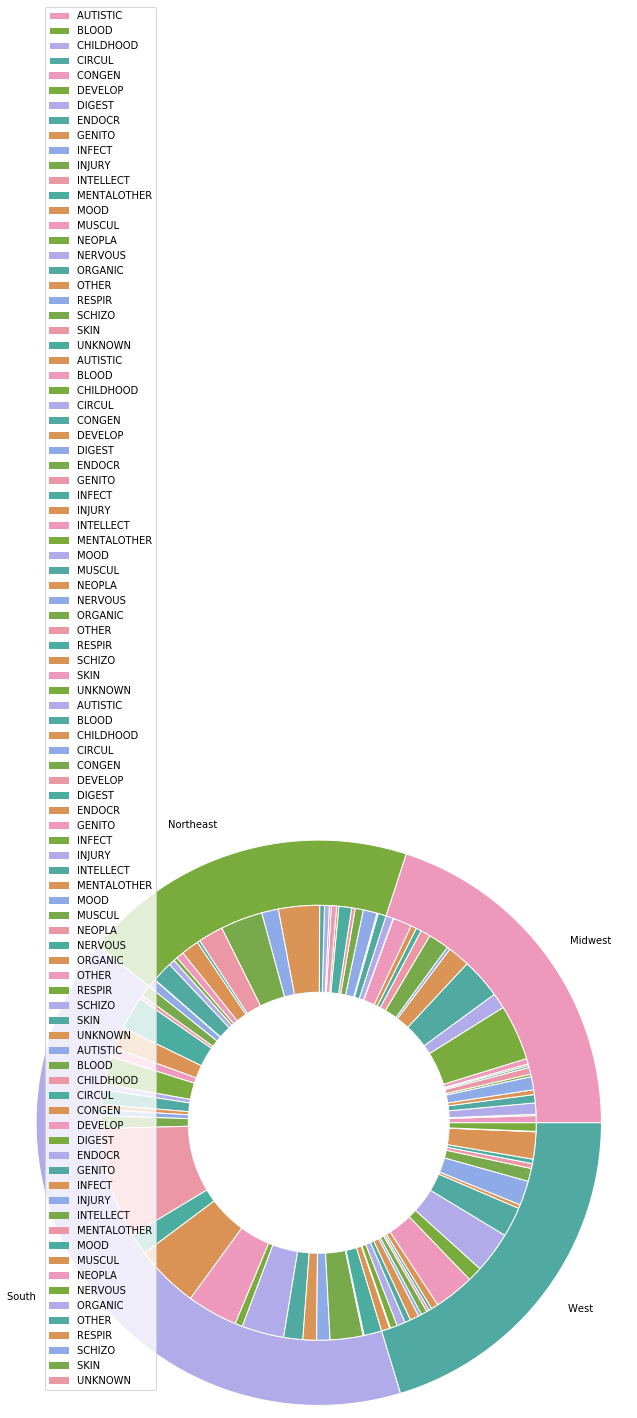

In [10]:
# show it
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

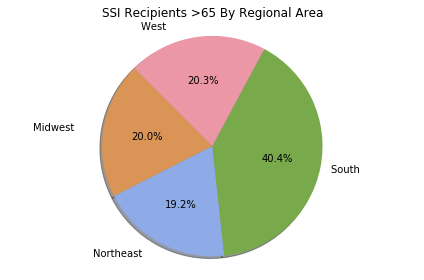

In [11]:
regional_df
plt.pie(
    # using data from groupby
    regional_df['RECIPIENTS'],
    # with the labels being types of city
    labels=regional_df['CENSUS REGION'],
    # with shadows
    shadow=True,
    # with colors
    colors=["#D99456", "#8EABE7", "#78AA4B", "#EC97A5"],
    # with one slide exploded out
    #explode=(0, 0, .1, 0),
    # with the start angle at 135%
    startangle=135,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# Add a title to the chart
plt.title("SSI Recipients >65 By Regional Area")

# View the plot
plt.tight_layout()
plt.show()

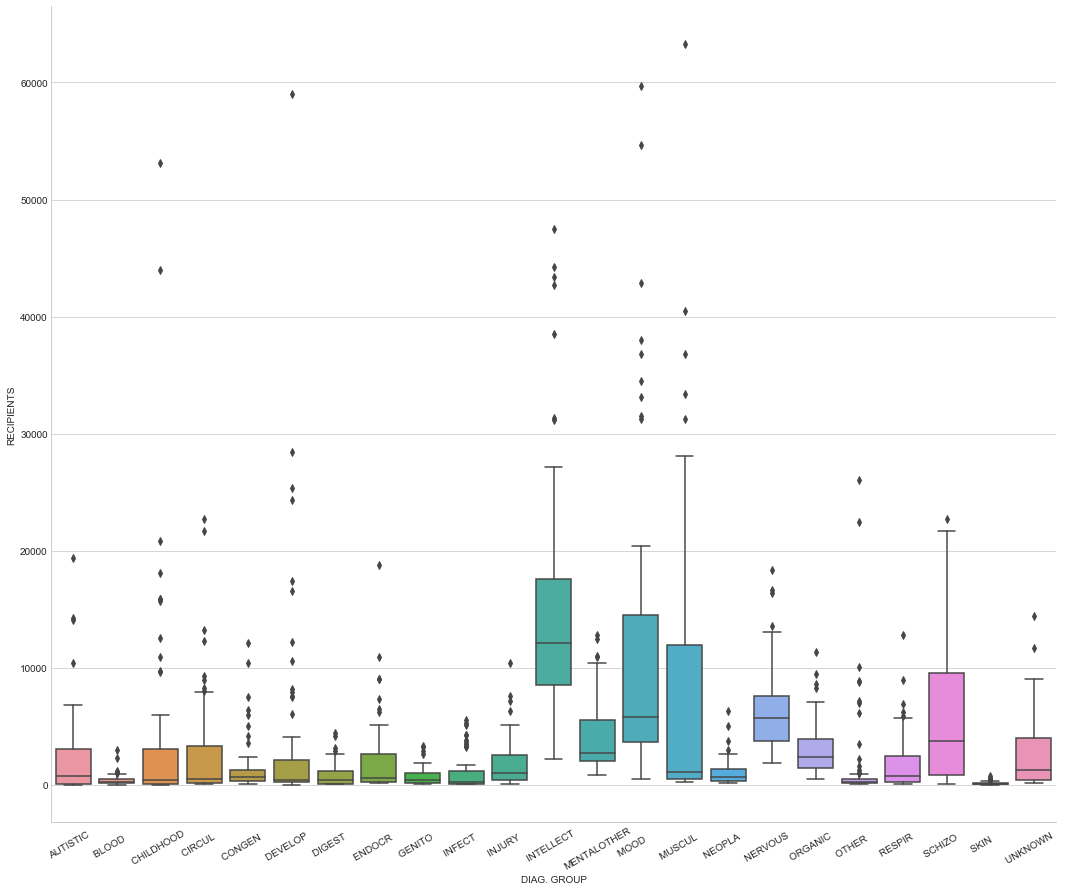

In [12]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,15))
g = sns.boxplot(x="DIAG. GROUP", y="RECIPIENTS", data=ssi_data_df, ax=ax)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
sns.despine()
# Save the figure as png image
plt.savefig("diagnosis_ssi.png")
plt.show()


In [13]:
#fig, ax = plt.subplots(figsize=(8,5))
#sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(18,15))
sns.factorplot(x="AGE  ", y="RECIPIENTS", data=ssi_data_df, fit_reg=False, hue='DIAG. GROUP', legend=True, ax=ax)
#g.set_xticklabels(g.get_xticklabels(),rotation=30)
sns.despine()


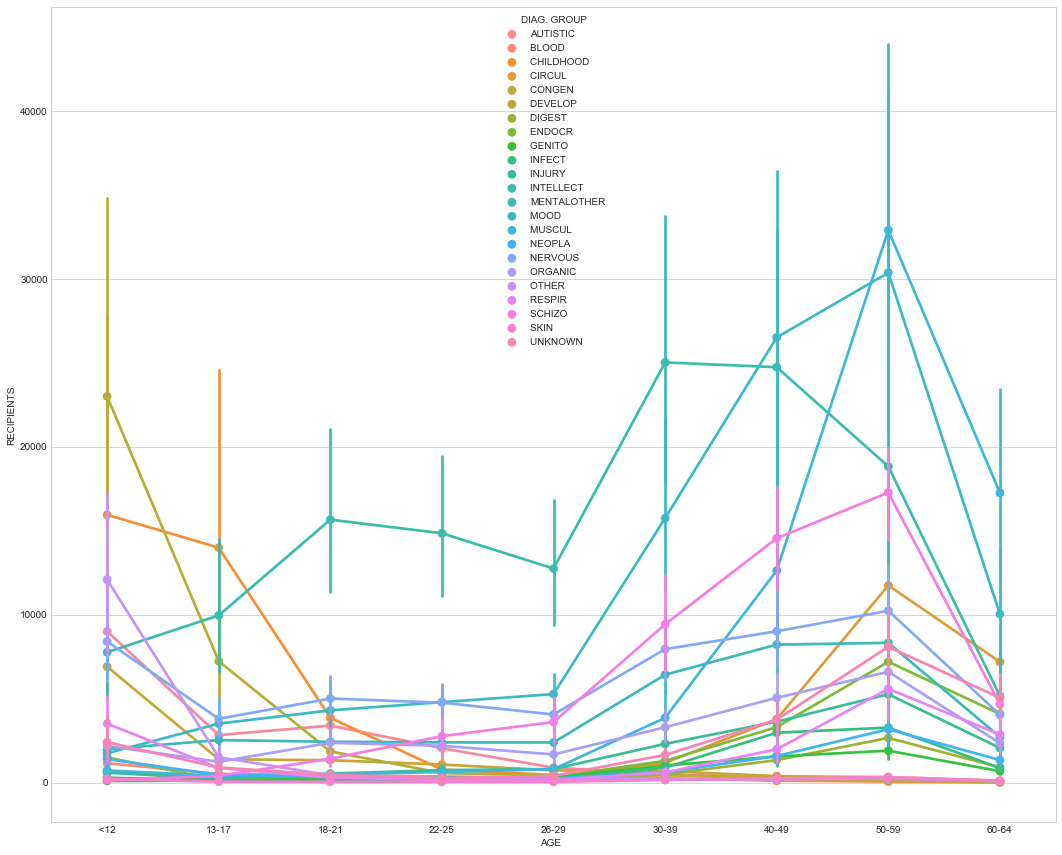

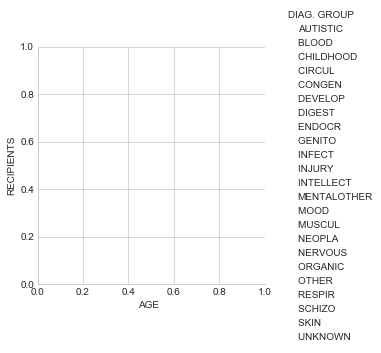

In [14]:
# Save the figure as png image
plt.savefig("age_ssi.png")
plt.show()

In [15]:
# plt.scatter(ssi_data_df["DIAG. GROUP"],
            #ssi_data_df["CENSUS REGION"],
            #linewidths=1, marker="o",
            #alpha=0.4, label="?")

# Label the graph and set axis limits
#plt.title("title")
#plt.ylabel("y")
#plt.xlabel("x")
#plt.grid(True)
#plt.xlim([-90,90])

# Show plot
#plt.show()